In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import numpy as np

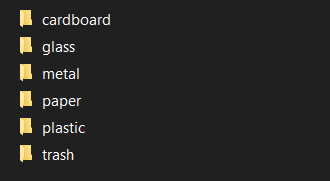

In [2]:
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

LABELS = ["blue", "green", "yellow", "blue", "yellow", "black"]
TRASH = [i for i in os.listdir(os.getcwd() + "\\images\\colours")]

DIR = os.getcwd() + "\\images\\test_img"

In [3]:
def prepare_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img1 = image.img_to_array(img) / 255
    img1 = np.expand_dims(img1, axis=0)
    return img1, img 

In [10]:
def predict(name):
    m = load_model(f"models/{name}")
    img_arr, label_arr = [], []
    for img_p in os.listdir(DIR):
        img_path = os.path.join(DIR, img_p)
        img, img2 = prepare_img(img_path)

        prediction = m.predict(img)
        img_arr.append(img2)
        p = np.argmax(prediction[0])
        label = f"{LABELS[p]}, ({TRASH[p]})"
        label_arr.append(label)
    return img_arr, label_arr

In [11]:
name = "garbage.h5"
img_arr, label_arr = predict(name)

for i in range(len(img_arr)):
    img = img_arr[i]
    label = label_arr[i]
    plt.title(label)
    plt.imshow(img)
    plt.show()

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_5/conv2d_15/Conv2D (defined at <ipython-input-10-9d1ebff419a6>:8) ]] [Op:__inference_predict_function_1497]

Function call stack:
predict_function


In [ ]:
m = load_model("models/garbage_accuracy.h5")
img_arr, label_arr = predict(m)

for i in range(len(img_arr)):
    img = img_arr[i]
    label = label_arr[i]
    plt.title(label)
    plt.imshow(img)
    plt.show()